#Implement Recursive Neural Tensor Network using tensorflow.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Flatten, Dropout
from keras.initializers import RandomNormal

# Define Recursive Neural Tensor Network (RNTN) model with increased complexity
def build_rntn(vocab_size, embedding_size):
    input_layer = Input(shape=(vocab_size, embedding_size))

    # Word vectors
    word_vectors = Flatten()(input_layer)

    # Tensor layer
    tensor_layer = tf.linalg.matmul(tf.expand_dims(word_vectors, axis=-1), tf.expand_dims(word_vectors, axis=1))
    tensor_layer = Flatten()(tensor_layer)

    # Concatenate word vectors and tensor layer
    combined_layer = Concatenate()([word_vectors, tensor_layer])

    # Fully connected layers with increased complexity
    fc1 = Dense(50, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1))(combined_layer)
    fc1 = Dropout(0.5)(fc1)  # Adding dropout for regularization
    fc2 = Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1))(fc1)
    fc2 = Dropout(0.5)(fc2)
    output_layer = Dense(1, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1))(fc2)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# Example usage with increased batch size for dummy data
vocab_size = 100  # Increased vocabulary size
embedding_size = 20  # Increased embedding size

rntn_model = build_rntn(vocab_size, embedding_size)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)  # Adjusted learning rate
rntn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Generate dummy training data with increased batch size
train_batch_size = 64
train_input_data = tf.random.normal((train_batch_size, vocab_size, embedding_size))
train_labels = tf.random.uniform((train_batch_size, 1), minval=0, maxval=2, dtype=tf.int32)

# Generate dummy test data with increased batch size
test_batch_size = 32
test_input_data = tf.random.normal((test_batch_size, vocab_size, embedding_size))
test_labels = tf.random.uniform((test_batch_size, 1), minval=0, maxval=2, dtype=tf.int32)

# Train the model with increased epochs
history = rntn_model.fit(train_input_data, train_labels, epochs=20, batch_size=train_batch_size, validation_data=(test_input_data, test_labels), verbose=1)


Epoch 1/20
1/1 [==============================] - 15s 15s/step - loss: 16.9944 - accuracy: 0.5469 - val_loss: 10.1735 - val_accuracy: 0.4688
Epoch 2/20
1/1 [==============================] - 11s 11s/step - loss: 26.6043 - accuracy: 0.5938 - val_loss: 9.8071 - val_accuracy: 0.4688
Epoch 3/20
1/1 [==============================] - 7s 7s/step - loss: 12.2116 - accuracy: 0.6875 - val_loss: 9.5956 - val_accuracy: 0.4688
Epoch 4/20
1/1 [==============================] - 9s 9s/step - loss: 19.3932 - accuracy: 0.7656 - val_loss: 9.3780 - val_accuracy: 0.4375
Epoch 5/20
1/1 [==============================] - 7s 7s/step - loss: 22.8520 - accuracy: 0.7188 - val_loss: 9.1300 - val_accuracy: 0.4375
Epoch 6/20
1/1 [==============================] - 8s 8s/step - loss: 34.6523 - accuracy: 0.6719 - val_loss: 8.9395 - val_accuracy: 0.4688
Epoch 7/20
1/1 [==============================] - 6s 6s/step - loss: 22.3666 - accuracy: 0.7969 - val_loss: 8.7516 - val_accuracy: 0.4688
Epoch 8/20
1/1 [=============

In [ ]:
# Predictions on test data
predictions = rntn_model.predict(test_input_data)

# Create a table of predicted values against test labels
table = pd.DataFrame({'Test Labels': test_labels.numpy().flatten(), 'Predicted Values': predictions.flatten()})
print("Table of Predicted Values against Test Labels:")
print(table)

1/1 [==============================] - 2s 2s/step
Table of Predicted Values against Test Labels:
    Test Labels  Predicted Values
0             0      8.301851e-01
1             1      1.262085e-11
2             1      9.999568e-01
3             1      9.166635e-01
4             1      1.000000e+00
5             1      1.000000e+00
6             0      7.581893e-18
7             0      8.254212e-01
8             0      1.000000e+00
9             1      1.210851e-06
10            0      5.184276e-03
11            0      1.613476e-07
12            0      1.000000e+00
13            0      1.000000e+00
14            1      9.998938e-01
15            0      9.995377e-01
16            1      2.832852e-09
17            0      1.563346e-06
18            0      2.299066e-10
19            1      1.000000e+00
20            1      3.473338e-13
21            0      1.000000e+00
22            0      2.585898e-08
23            1      9.998140e-01
24            0      7.930070e-01
25            1    

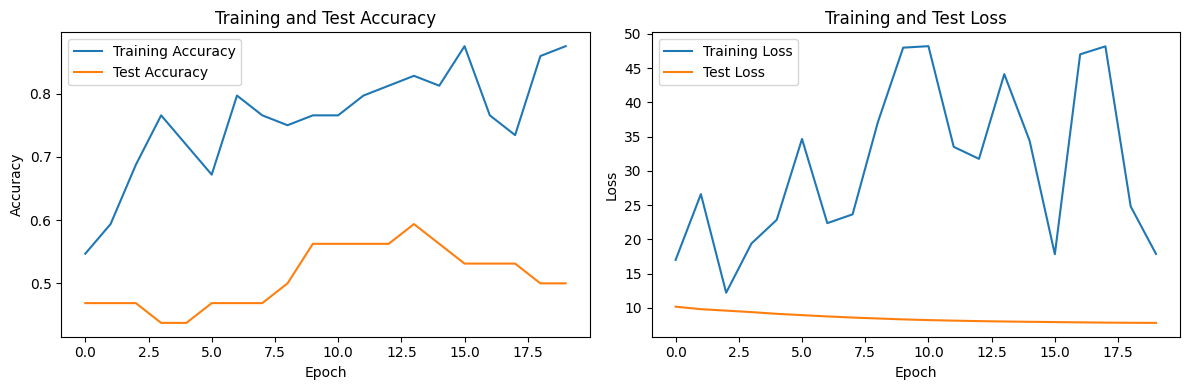

In [ ]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()